In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
#Reading dataframe object
data = pd.read_excel('D:\stockmarket2022.xlsx')
data
#Always use read_excel for all excel files read_csv only for csv file and mention .xlsx in the end of string

,date,open,high,low,close,adjclose,volume,ticker
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE
...,...,...,...,...,...,...,...,...
246,2022-12-23,15.360000,15.590000,15.240000,15.380000,15.380000,153100,ASLE
247,2022-12-27,15.430000,15.825000,15.100000,15.670000,15.670000,116600,ASLE
248,2022-12-28,15.690000,15.940000,15.450000,15.760000,15.760000,187200,ASLE
249,2022-12-29,15.880000,16.070000,15.770000,16.040001,16.040001,194000,ASLE


In [3]:
columns_to_4decimals = ['open', 'high', 'low', 'close']
decimal_places = 4

data[columns_to_4decimals] = np.round(data[columns_to_4decimals], decimal_places)
data

,date,open,high,low,close,adjclose,volume,ticker
0,2022-01-03,17.80,18.219,17.50,17.76,17.760000,106600,ASLE
1,2022-01-04,17.70,18.310,17.62,17.66,17.660000,128700,ASLE
2,2022-01-05,17.58,17.800,16.91,16.95,16.950001,103100,ASLE
3,2022-01-06,16.65,16.880,16.14,16.17,16.170000,173600,ASLE
4,2022-01-07,16.22,16.290,15.63,15.71,15.710000,137800,ASLE
...,...,...,...,...,...,...,...,...
246,2022-12-23,15.36,15.590,15.24,15.38,15.380000,153100,ASLE
247,2022-12-27,15.43,15.825,15.10,15.67,15.670000,116600,ASLE
248,2022-12-28,15.69,15.940,15.45,15.76,15.760000,187200,ASLE
249,2022-12-29,15.88,16.070,15.77,16.04,16.040001,194000,ASLE


In [4]:
columns_to_drop = ['adjclose', 'ticker']
data.drop(columns=columns_to_drop, inplace=True) 
# inplace - true implies that no new data is created and changed in existing dataframe

columns_order = ['date', 'open', 'low','high','volume','close']
data = data[columns_order]
data

,date,open,low,high,volume,close
0,2022-01-03,17.80,17.50,18.219,106600,17.76
1,2022-01-04,17.70,17.62,18.310,128700,17.66
2,2022-01-05,17.58,16.91,17.800,103100,16.95
3,2022-01-06,16.65,16.14,16.880,173600,16.17
4,2022-01-07,16.22,15.63,16.290,137800,15.71
...,...,...,...,...,...,...
246,2022-12-23,15.36,15.24,15.590,153100,15.38
247,2022-12-27,15.43,15.10,15.825,116600,15.67
248,2022-12-28,15.69,15.45,15.940,187200,15.76
249,2022-12-29,15.88,15.77,16.070,194000,16.04


In [5]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime('%d-%m-%Y')
data

,date,open,low,high,volume,close
0,03-01-2022,17.80,17.50,18.219,106600,17.76
1,04-01-2022,17.70,17.62,18.310,128700,17.66
2,05-01-2022,17.58,16.91,17.800,103100,16.95
3,06-01-2022,16.65,16.14,16.880,173600,16.17
4,07-01-2022,16.22,15.63,16.290,137800,15.71
...,...,...,...,...,...,...
246,23-12-2022,15.36,15.24,15.590,153100,15.38
247,27-12-2022,15.43,15.10,15.825,116600,15.67
248,28-12-2022,15.69,15.45,15.940,187200,15.76
249,29-12-2022,15.88,15.77,16.070,194000,16.04


In [ ]:
# no null values in the dataset will check for outliers during visualization

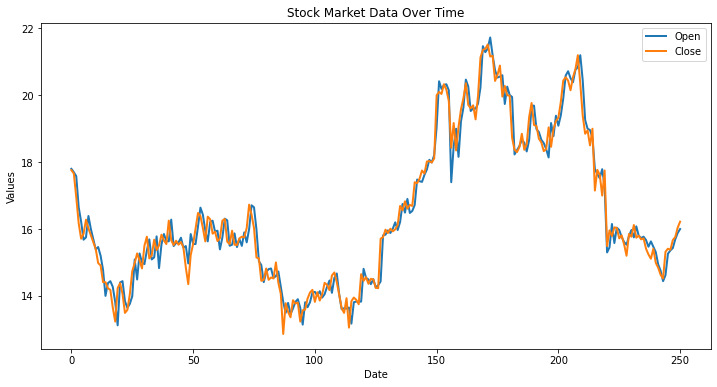

In [6]:
#visualizing the data that we processed using matplotlib and seaborn
plt.figure(figsize=(12, 6))
plt.plot(data['open'], label='Open', linewidth=2)
plt.plot(data['close'], label='Close', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock Market Data Over Time')
plt.legend()


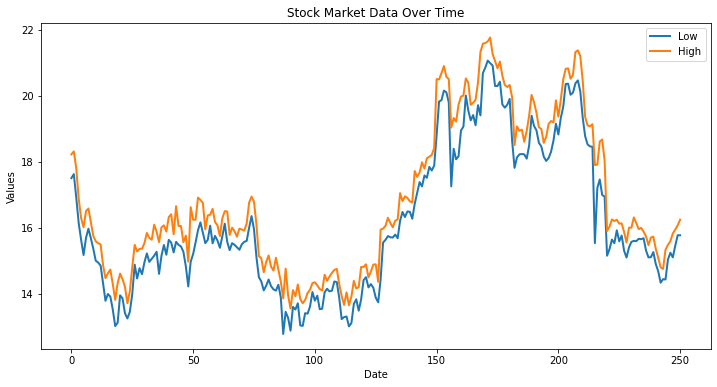

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data['low'], label='Low', linewidth=2)
plt.plot(data['high'], label='High', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock Market Data Over Time')
plt.legend()


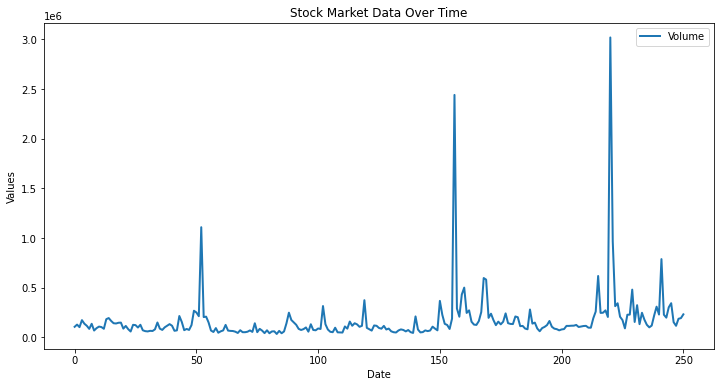

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['volume'], label='Volume', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Stock Market Data Over Time')
plt.legend()


In [9]:
X = data[['open', 'low', 'high', 'volume']]
y = data['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (200, 4)
X_test shape: (51, 4)
y_train shape: (200,)
y_test shape: (51,)


In [10]:
X_train

,open,low,high,volume
158,19.00,18.070,19.210,207900
215,17.79,15.530,17.895,617900
101,14.01,13.940,14.250,84800
137,16.49,16.322,16.950,74200
66,15.53,15.530,16.000,57300
...,...,...,...,...
106,14.46,14.070,14.520,52500
14,14.00,13.785,14.470,194500
92,13.82,13.520,13.925,85700
179,20.26,19.720,20.260,135500


In [11]:
X_test

,open,low,high,volume
155,20.15,19.790,20.500,189000
6,15.75,15.690,16.500,85800
164,19.53,19.250,19.720,128800
60,15.95,15.610,16.070,61000
113,13.62,13.310,14.040,159400
182,18.23,17.810,18.500,202800
198,18.78,18.640,19.188,82800
248,15.69,15.450,15.940,187200
9,15.70,15.360,15.750,92900
118,13.82,13.485,14.195,116500


In [12]:
y_train

158    18.35
215    17.15
101    14.11
137    16.83
66     15.95
       ...  
106    14.17
14     14.41
92     13.77
179    20.00
102    13.86
Name: close, Length: 200, dtype: float64

In [13]:
y_test

155    19.83
6      16.28
164    19.61
60     15.64
113    13.93
182    18.37
198    18.99
248    15.76
9      15.59
118    13.75
175    20.61
217    17.62
219    17.75
139    16.72
67     15.53
225    15.72
195    18.39
15     14.23
120    14.45
24     14.05
241    14.84
19     14.23
115    13.84
68     15.52
177    19.96
45     15.61
55     15.63
10     15.40
30     15.50
234    15.69
237    15.24
33     15.21
220    15.49
196    19.04
25     14.74
126    14.23
18     13.23
73     16.73
132    15.93
82     14.55
119    14.65
97     13.92
79     14.48
84     15.00
192    18.70
16     14.18
86     14.06
124    14.49
181    18.73
38     15.66
173    21.18
Name: close, dtype: float64

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(predictions)
print("Mean Squared Error:", mse)

[20.14095838 16.28749908 19.44720577 15.77696029 13.59737534 18.08278585
 18.88229883 15.66012908 15.46908464 13.74340357 20.56535099 17.90160374
 17.18113463 16.77306643 15.57831391 15.7326581  18.27926499 14.23409151
 14.51821434 13.70346859 15.4961453  13.52301507 13.50294787 15.65785013
 20.06545013 15.73994309 15.59906037 15.22970886 15.47156221 15.86791627
 15.18093129 15.53511986 17.09659932 18.5273475  14.47940902 13.87632925
 13.23641196 16.61860658 15.77446492 14.35605636 14.33274261 13.67112087
 14.34649357 14.5521771  18.7507152  14.17793336 14.05619226 14.50624875
 18.89539635 15.68633439 21.07120783]
Mean Squared Error: 0.11208055494356166


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.11208055494356166


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}
svr = SVR()

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)

best_params = grid_search.best_params_

# Train the model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_normalized, y_train)

# Make predictions on the test set
predictions = best_svr_model.predict(X_test_normalized)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)

# Print the results
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)

Best Hyperparameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'linear'}
Mean Squared Error: 0.04272227286298359


In [18]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2 = r2_score(y_test, predictions)
accuracy_percentage = r2 * 100
print("R-squared (Accuracy) in Percentage:", accuracy_percentage)


R-squared (Accuracy) in Percentage: 98.9475229544524
